
#### importing libraries

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
warnings.filterwarnings('ignore')


### reading dataset as pandas dataframe

In [5]:

df = pd.read_csv(r'insurance.csv')



In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.shape

(1338, 7)


There are 1338 records and 7 features present in dataset

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


From above we can see that distribution of Age is between 18 to 64

In [10]:
df.isna().sum().sum()

0

There are no missing Values  in the dataset

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0, 0.5, 'Count')

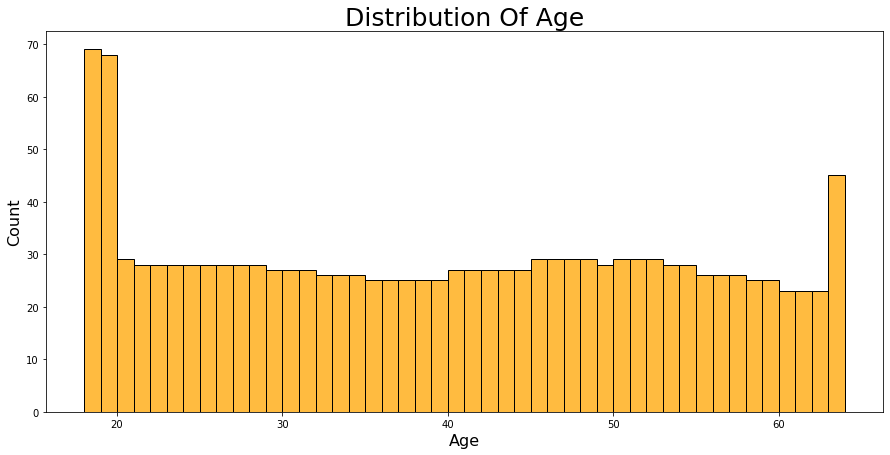

In [17]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=df,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

Text(0, 0.5, 'Frequency')

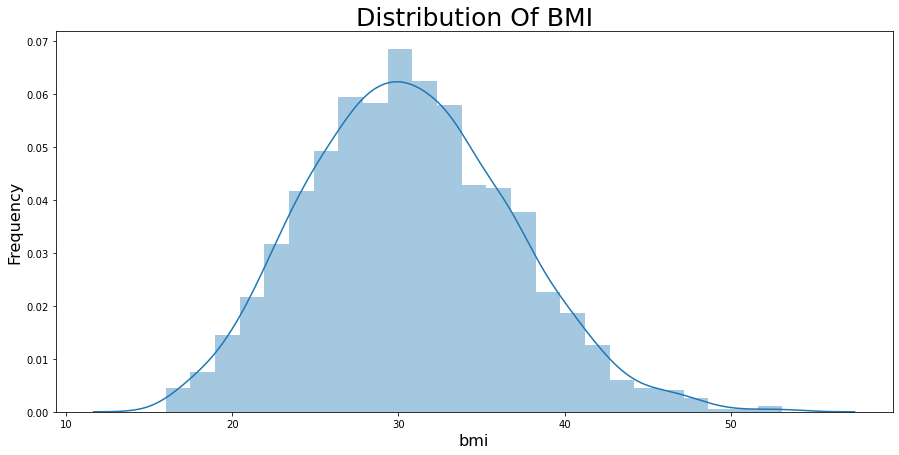

In [18]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

<AxesSubplot:xlabel='bmi'>

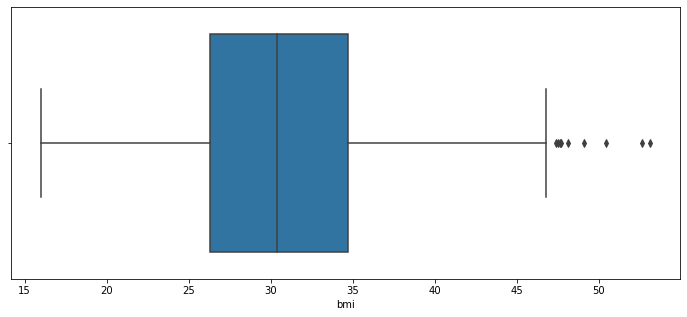

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bmi',data=df)

We can see from above barplot that there are some outliers in feature named bmi

<AxesSubplot:xlabel='expenses', ylabel='Count'>

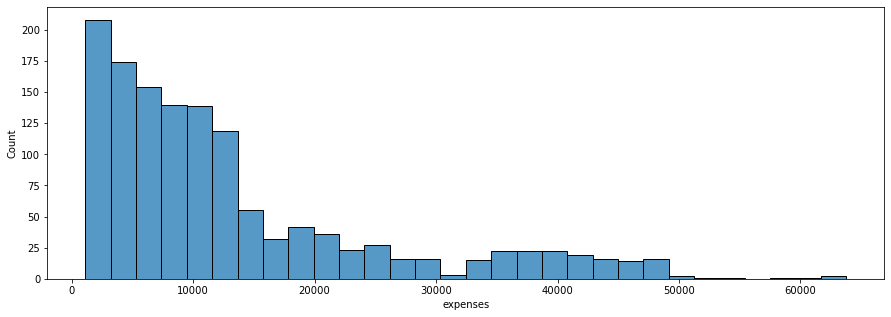

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(x='expenses',data=df)

<AxesSubplot:xlabel='expenses'>

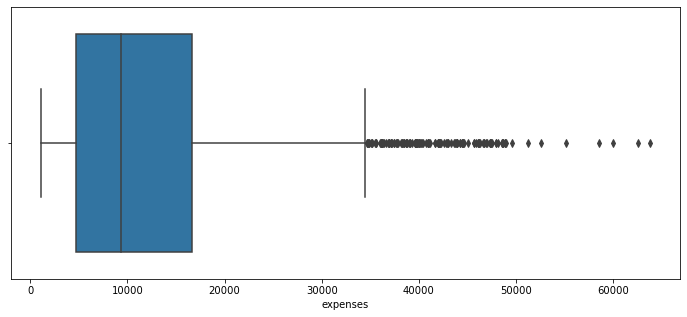

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(x='expenses',data=df)

From above barplot it is clear that there are some outliers in feature called expenses

Text(0, 0.5, 'count')

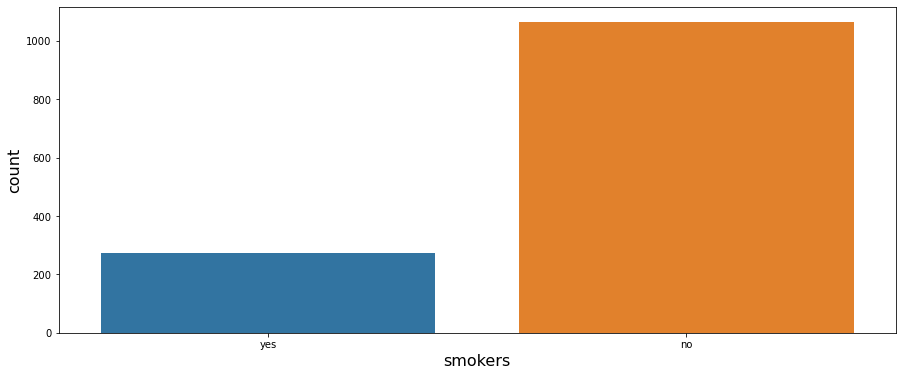

In [22]:
plt.figure(figsize=(15,6))
bp2=sns.countplot(x='smoker',data=df)
bp2.set_xlabel("smokers", fontsize=16)
bp2.set_ylabel("count", fontsize=16)

smokers are very less than non-smokers

Text(0, 0.5, 'smokers')

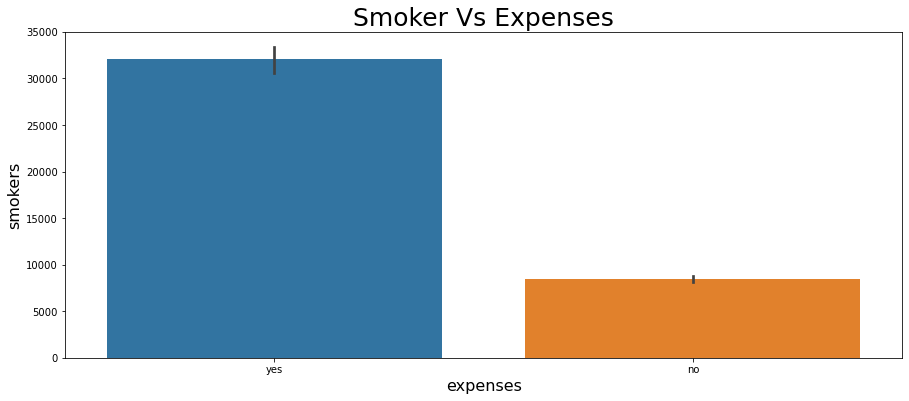

In [23]:
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
bp3=sns.barplot(x='smoker',y='expenses',data=df)
bp3.set_xlabel("expenses", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

Expenses of smokers are more as compared to non smokers

Text(0, 0.5, 'expenses')

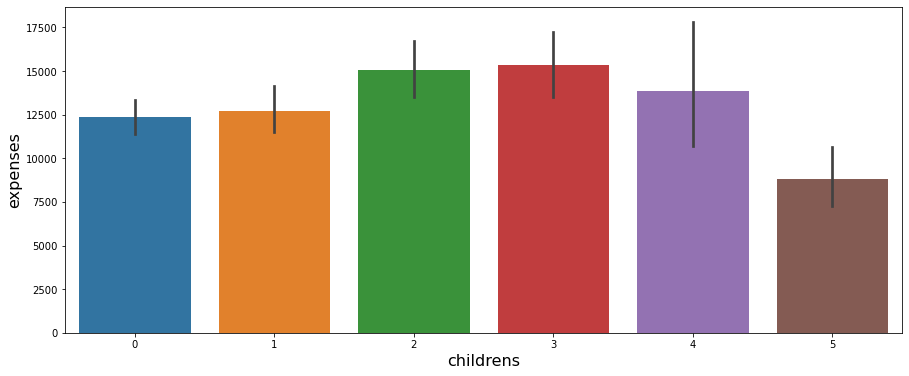

In [24]:
plt.figure(figsize=(15,6))
bp4=sns.barplot(x='children',y='expenses',data=df)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

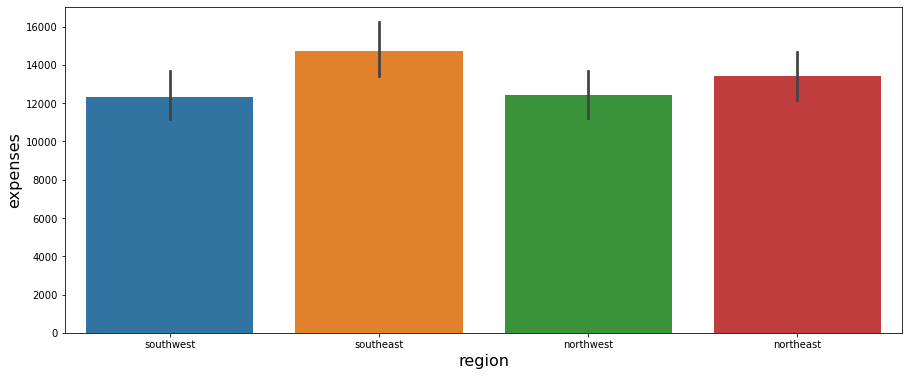

In [25]:
plt.figure(figsize=(15,6))
bp5=sns.barplot(x='region',y='expenses',data=df)
bp5.set_xlabel("region", fontsize=16)
bp5.set_ylabel("expenses", fontsize=16)

Southeast region has more expenses then other region

Text(0, 0.5, 'count')

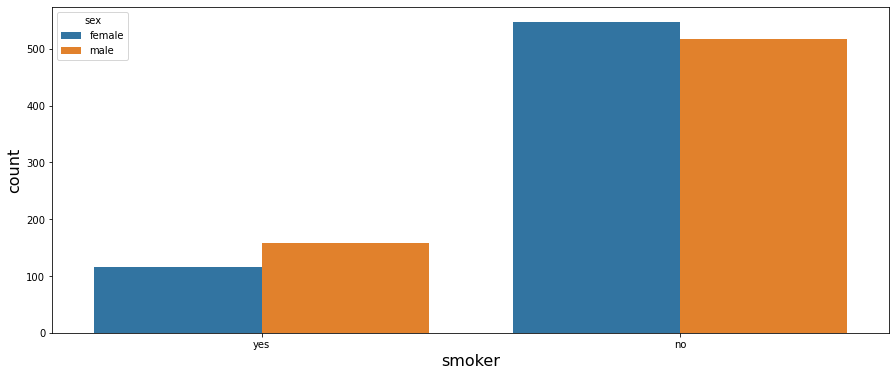

In [27]:
plt.figure(figsize=(15,6))
bp6=sns.countplot(x=df.smoker,hue=df.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

Male smokers are more compared to female

Text(0, 0.5, 'Expenses')

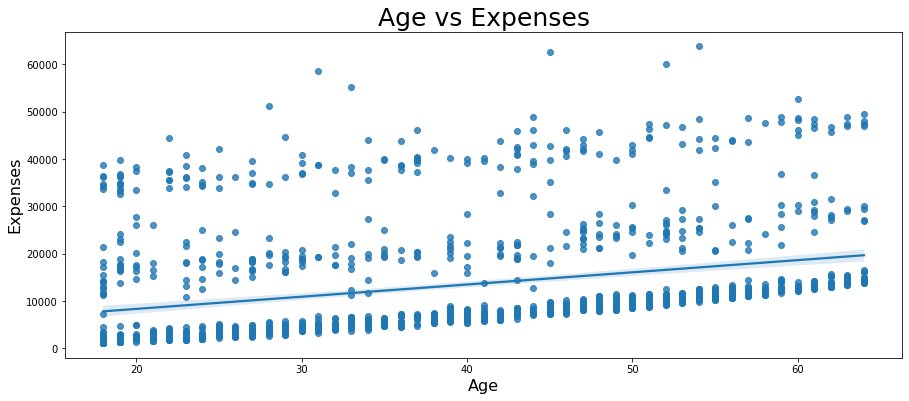

In [28]:
plt.figure(figsize=(15,6))
plt.title("Age vs Expenses",fontsize=25)
bp7=sns.regplot(x='age',y='expenses',data=df)
bp7.set_xlabel("Age", fontsize=16)
bp7.set_ylabel("Expenses", fontsize=16)

Text(0, 0.5, 'expenses')

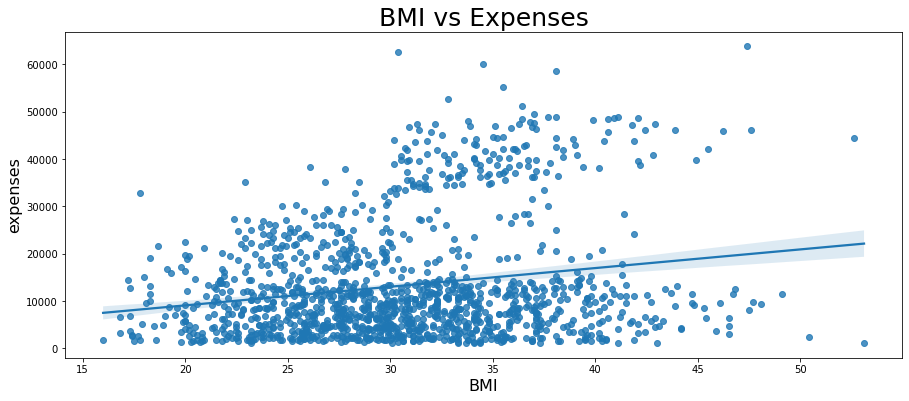

In [29]:
plt.figure(figsize=(15,6))
plt.title("BMI vs Expenses",fontsize=25)
bp8=sns.regplot(x='bmi',y='expenses',data=df)
bp8.set_xlabel("BMI", fontsize=16)
bp8.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

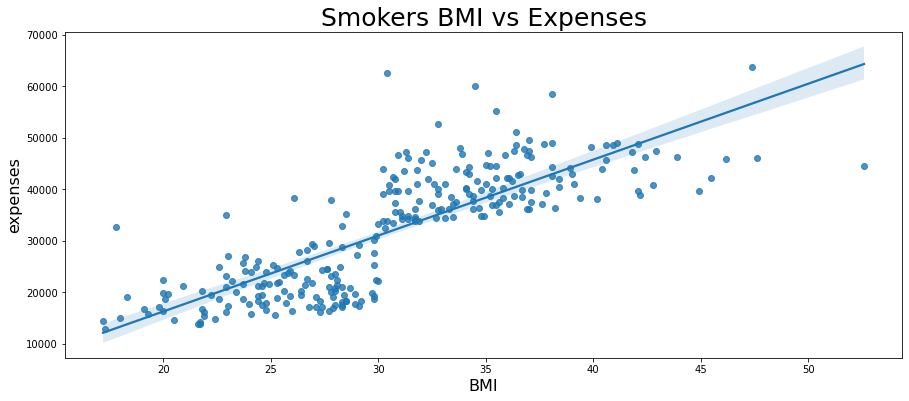

In [33]:
#smokers bmi vs expenses
plt.figure(figsize=(15,6))
plt.title("Smokers BMI vs Expenses",fontsize=25)
smokers_bmi=df[df['smoker']=='yes']
bp9=sns.regplot(x='bmi',y='expenses',data=smokers_bmi)
bp9.set_xlabel("BMI", fontsize=16)
bp9.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'Expenses')

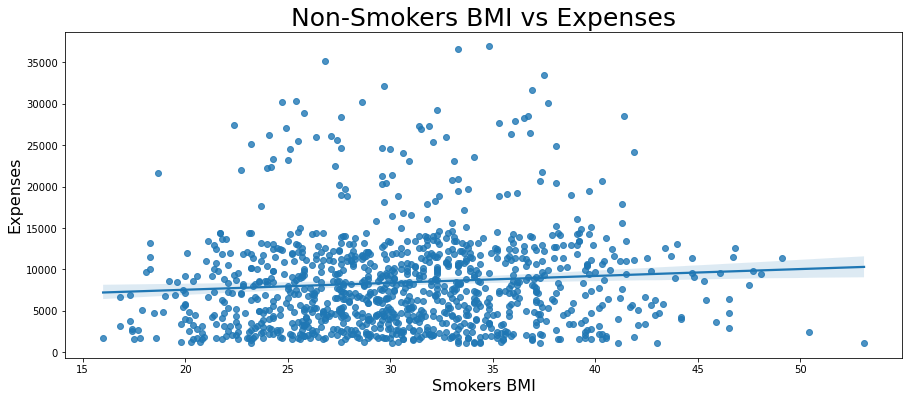

In [34]:
#non smokers bmi vs expenses
plt.figure(figsize=(15,6))
plt.title("Non-Smokers BMI vs Expenses",fontsize=25)
non_smokers_bmi=df[df['smoker']=='no']
bp10=sns.regplot(x='bmi',y='expenses',data=non_smokers_bmi)
bp10.set_xlabel("Smokers BMI", fontsize=16)
bp10.set_ylabel("Expenses", fontsize=16)



expenses increases with respect to bmi if the person is smoker

In [35]:
Smoker=(df['smoker']=='yes')
non_smoker=(df['smoker']=='no')

In [36]:
df.loc[Smoker,'smoker']=1
df.loc[non_smoker,'smoker']=0

In [43]:
SEregion=(df['region']=='southeast')
SWregion=(df['region']=='southwest')
NWregion=(df['region']=='northwest')
NEregion=(df['region']=='northeast')

In [44]:
df.loc[SEregion,'region']=1
df.loc[SWregion,'region']=2
df.loc[NWregion,'region']=3
df.loc[NEregion,'region']=4

In [45]:
men=(df['sex']=='male')
women=(df['sex']=='female')

In [46]:
df.loc[men,'sex']=1
df.loc[women,'sex']=0

In [47]:
convert_dict={'sex':float,'smoker':float,'region':float}

In [48]:
df=df.astype(convert_dict)

In [50]:
df.expenses.corr(df.smoker)

0.7872514298985536

In [51]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


In [52]:
cor=df.corr()

<AxesSubplot:>

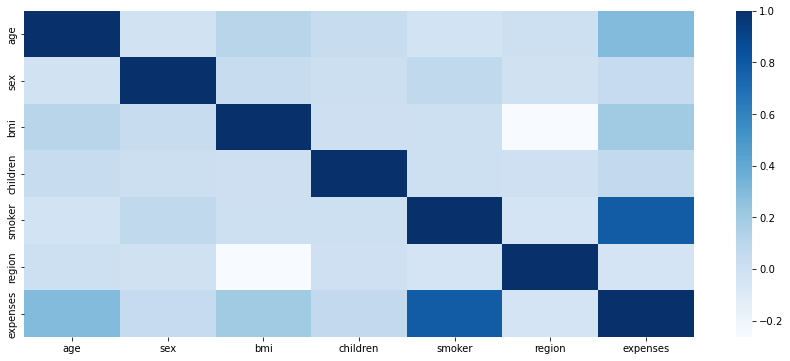

In [53]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='Blues')



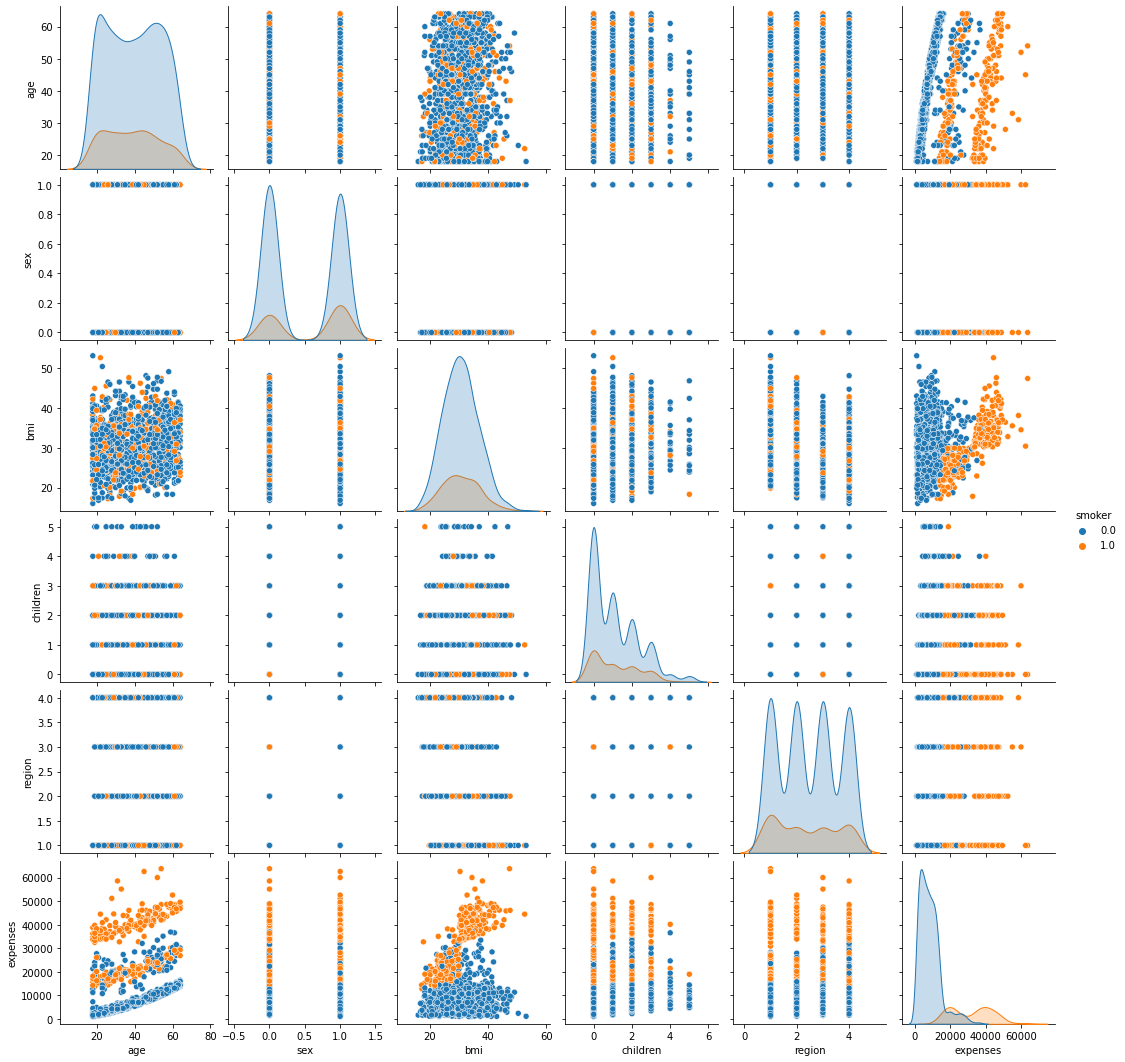

In [54]:
sns.pairplot(data=df,hue='smoker')

**Applying Machine Learning Models**

In [55]:
X=df.drop(['expenses'],axis=1)
Y=df['expenses']

**Dividing the data into train and Test**

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [64]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(x_train)
    y_pred_model_test = model.predict(x_test)
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, Y, cv=cvn)
    accuracy_cv_model = r2_score(Y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

**1) Linear Regression**

In [65]:
regressor=LinearRegression()

In [66]:
regressor.fit(x_train,y_train)

LinearRegression()

In [67]:
model_summary(regressor, "Multiple_linear_Regression")

Multiple_linear_Regression
Training R2 Score:  0.7370016151361497
Testing R2 Score:  0.7998296193361614
RMSE for Training Data:  6140.445096976812
RMSE for Testing Data:  5643.8555314010555
Accuracy for 20 - Fold Cross Predicted:  0.7472738794666414


**Applying Decision Tree**

In [69]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(x_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training R2 Score:  0.8729818821059496
Testing R2 Score:  0.8348947400286508
RMSE for Training Data:  4267.329210234343
RMSE for Testing Data:  5125.7383763305415
Accuracy for 20 - Fold Cross Predicted:  0.8498632643795985


**Applying Random Forest**

In [70]:
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
model_summary(random_forest_reg,"Random_Forest_Regressor")

Random_Forest_Regressor
Training R2 Score:  0.9749129867623747
Testing R2 Score:  0.8759801584385116
RMSE for Training Data:  1896.4779228675018
RMSE for Testing Data:  4442.439959427438
Accuracy for 20 - Fold Cross Predicted:  0.8356898864748873


**Applying XGBoost**

In [72]:

xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123,verbosity=0)
  
# Fitting the model
xgb_r.fit(x_train, y_train)
  
# Predict the model
pred = xgb_r.predict(x_test)

In [73]:
model_summary(xgb_r,"Xg_boost")

Xg_boost
Training R2 Score:  0.9132700849166746
Testing R2 Score:  0.8864202080281152
RMSE for Training Data:  3526.2067504045162
RMSE for Testing Data:  4251.346620624632
Accuracy for 20 - Fold Cross Predicted:  0.8477346692178661


We got R2 Score of 88.64% and Root mean square error of 4251 for test data

From above we conclude that XGBoost has maximum R2 Score and minimum Root Mean Square Error as compsared to other ML model